<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5/Arima_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


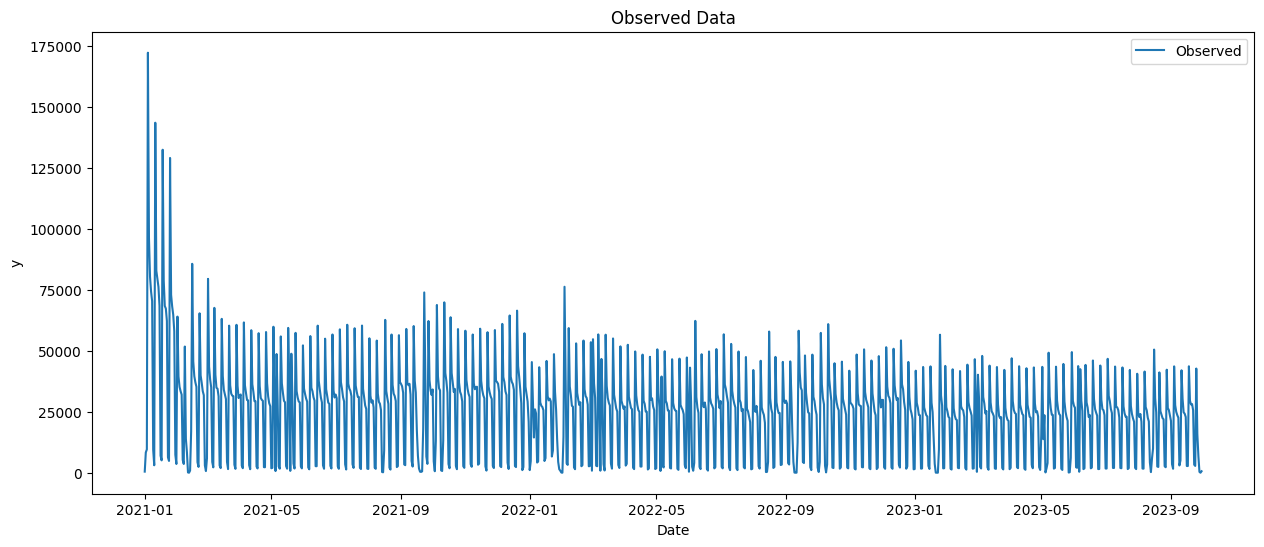

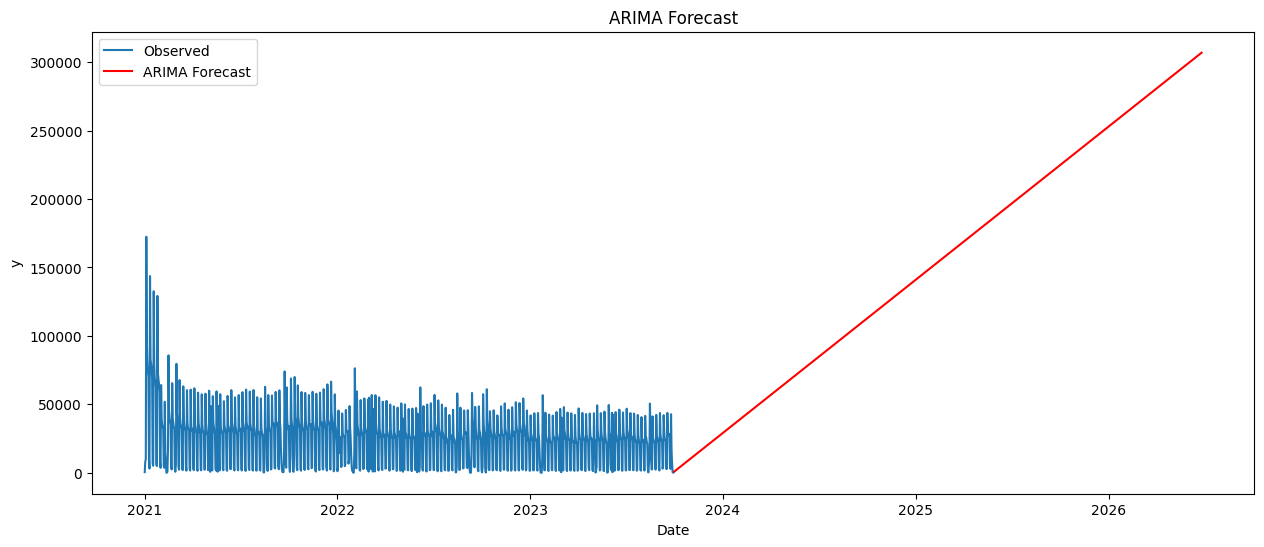

In [ ]:
# ARIMA 사용 기계학습
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 추출 및 전처리
df1 = data[['배송년월일', '가구/인테리어']]
df1.rename(columns={'배송년월일': 'ds', '가구/인테리어': 'y'}, inplace=True)

# 데이터 시각화
plt.figure(figsize=(15, 6))
plt.plot(df1['ds'], df1['y'], label='Observed')
plt.title('Observed Data')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

# ARIMA 모델 학습
model = ARIMA(df1['y'], order=(1, 2, 0))  # 예시로 (p, d, q) 값은 조절 가능
result = model.fit()

# 예측
forecast1 = result.get_forecast(steps=1000)
forecast_index = pd.date_range(start=df1['ds'].min(), periods=len(df1) + 1000, freq='D')
forecast_values = forecast1.predicted_mean

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(df1['ds'], df1['y'], label='Observed')
plt.plot(forecast_index[-1000:], forecast_values, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()


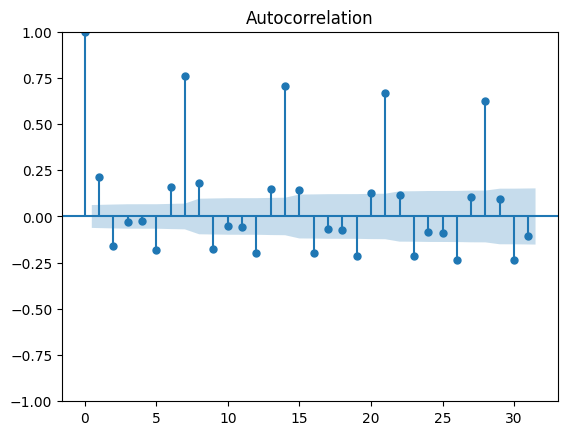

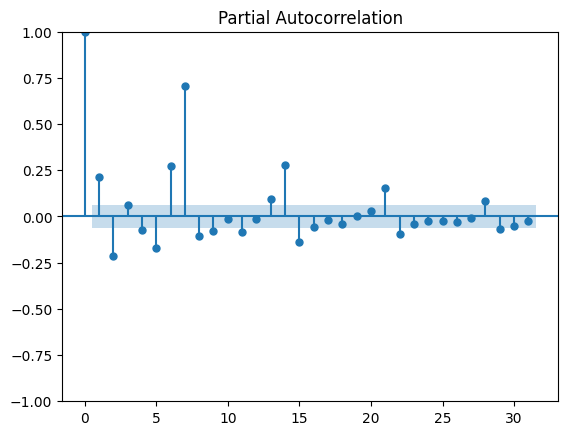

In [ ]:
from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as pdr
df1.reset_index(inplace=True)
f = Forecaster(y=df1['y'], current_dates = df1['ds'])
# f.plot()

f.plot_acf()
f.plot_pacf()
plt.show()

<Figure size 640x480 with 0 Axes>

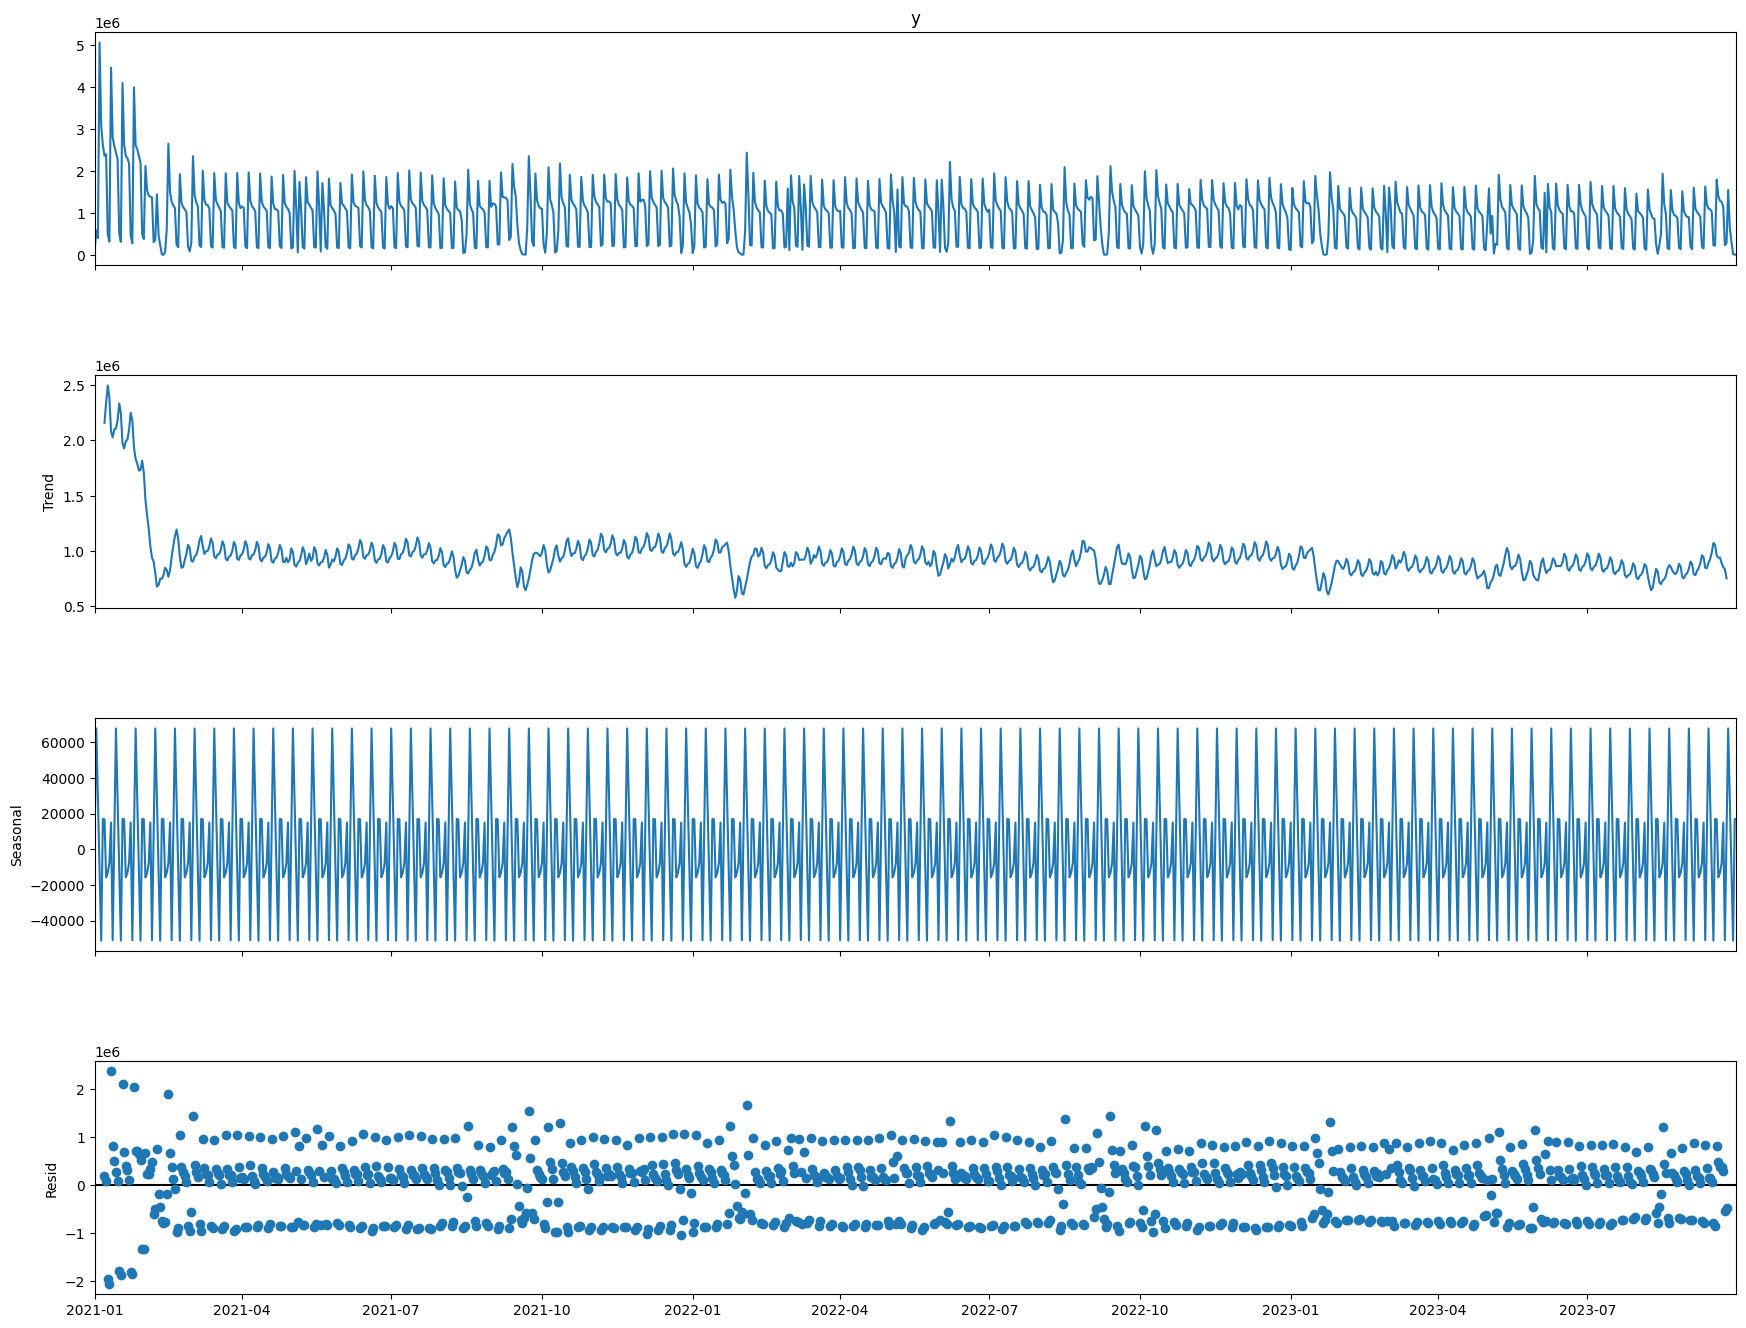

In [ ]:
# df.rename(columns={'배송년월일':'ds','총합':'y'},inplace=True)
# df = df.set_index('ds')
# df

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['y'], model='additive', period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

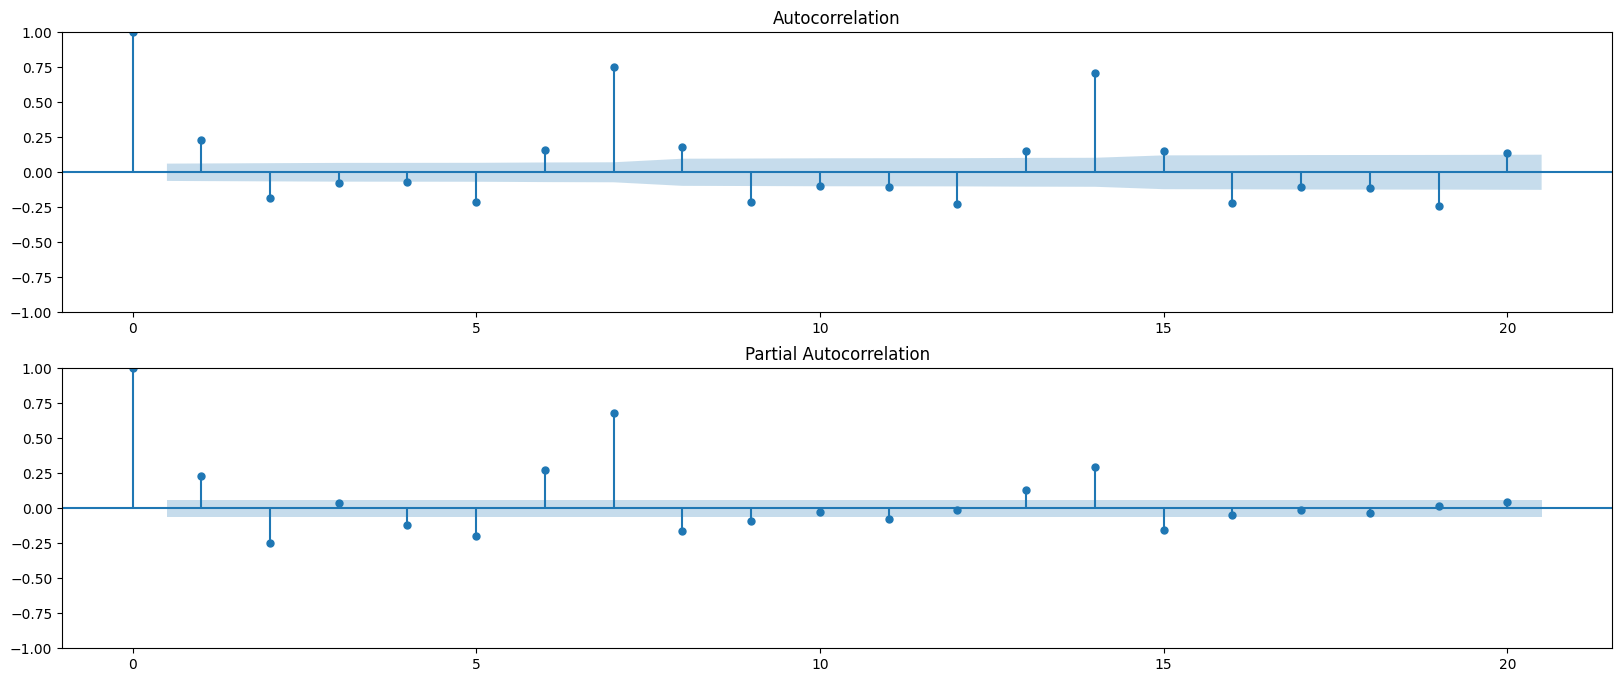

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)

In [ ]:
# p-value가 0이므로 정상성 만족
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
result
print('ADF.Statistics: %f'%result[0])
print('p-value: %f'%result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF.Statistics: -7.886246
p-value: 0.000000
Critical Values:
	1%:-3.437
	5%:-2.864
	10%:-2.568
